In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)



In [2]:
data=pd.read_csv('train.csv')


C:\Users\USER\AppData\Local\Temp\ipykernel_5804\2307144634.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('train.csv')


In [3]:
data.shape

(100000, 28)

In [4]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

# Data cleaning and split in to categorical and numerical

In [5]:
categorical_data=data[data.columns[data.dtypes=='O']]
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       100000 non-null  object
 1   Customer_ID              100000 non-null  object
 2   Month                    100000 non-null  object
 3   Name                     90015 non-null   object
 4   Age                      100000 non-null  object
 5   SSN                      100000 non-null  object
 6   Occupation               100000 non-null  object
 7   Annual_Income            100000 non-null  object
 8   Num_of_Loan              100000 non-null  object
 9   Type_of_Loan             88592 non-null   object
 10  Num_of_Delayed_Payment   92998 non-null   object
 11  Changed_Credit_Limit     100000 non-null  object
 12  Credit_Mix               100000 non-null  object
 13  Outstanding_Debt         100000 non-null  object
 14  Credit_History_Age   

In [6]:
categorical_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,NaN,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,Good,809.98,22 Years and 3 Months,No,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,6.27,Good,809.98,22 Years and 4 Months,No,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,22 Years and 5 Months,No,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [7]:
data= data.applymap(lambda x:x if x is np.NaN or not isinstance(x,str) else str(x).strip('_,"')).replace(['','nan','!@9#%8','#F%$D@*&8'],np.NaN)

In [8]:
data['Annual_Income']=data['Annual_Income'].astype(float)
data['Changed_Credit_Limit']=data['Changed_Credit_Limit'].astype(float)
data['Outstanding_Debt']=data['Outstanding_Debt'].astype(float)
data['Amount_invested_monthly']=data['Amount_invested_monthly'].astype(float)
data['Monthly_Balance']=data['Monthly_Balance'].astype(float)
data['Num_of_Delayed_Payment']=data['Num_of_Delayed_Payment'].astype(float)
data['Num_of_Loan']=data['Num_of_Loan'].astype(int)
data['Age']=data['Age'].astype(int)

In [9]:
def month(x):
    if pd.notnull(x):
        num1=int(x.split(' ')[0])
        num2=int(x.split(' ')[3])
        
        return num1*12+num2
        
    else :
        return x

In [10]:
data['Credit_History_Age']=data['Credit_History_Age'].apply(lambda x: month(x)).astype(float)
data['SSN']=data['SSN'].apply(lambda x: x if x is np.NaN else float(str(x).replace('-', ''))).astype(float)

In [11]:
cat_data=data[data.select_dtypes(include='O').columns]
cat_data.head()

,ID,Customer_ID,Month,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,No,High_spent_Small_value_payments,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Large_value_payments,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Medium_value_payments,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments,Good


In [12]:
num_data=data[data.columns[data.dtypes!='O']]
num_data.head()

,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23,821000265.0,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,80.415295,312.494089
1,23,821000265.0,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,809.98,31.944960,NaN,49.574949,118.280222,284.629162
2,-500,821000265.0,19114.12,NaN,3,4,3,4,3,7.0,NaN,4.0,809.98,28.609352,267.0,49.574949,81.699521,331.209863
3,23,821000265.0,19114.12,NaN,3,4,3,4,5,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,199.458074,223.451310
4,23,821000265.0,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,809.98,24.797347,269.0,49.574949,41.420153,341.489231


# Missing values 

In [13]:
data.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                          5572
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [14]:
def distribution(col,data,i):
    fig,ax=plt.subplots(1,2,figsize=(15,5))
    title=['Before Distribution','After Distribution']
    ax=np.ravel(ax)
    if i==1:
        sns.set(style='whitegrid')
        sns.kdeplot(data=data,x=col,ax=ax[0],color='#2171b5').set_title(title[i])
        sns.boxplot(data=data,x=col,ax=ax[1],palette='magma').set_title(title[i])
    else:
        sns.set(style='whitegrid')
        sns.kdeplot(data=data,x=col,ax=ax[0],color='#2171b5').set_title(title[i])
        sns.boxplot(data=data,x=col,ax=ax[1],palette='magma').set_title(title[i])
        
        ax=np.reshape(ax,(1,2))
        
        plt.tight_layout()

### 1. Num of delayed payment:

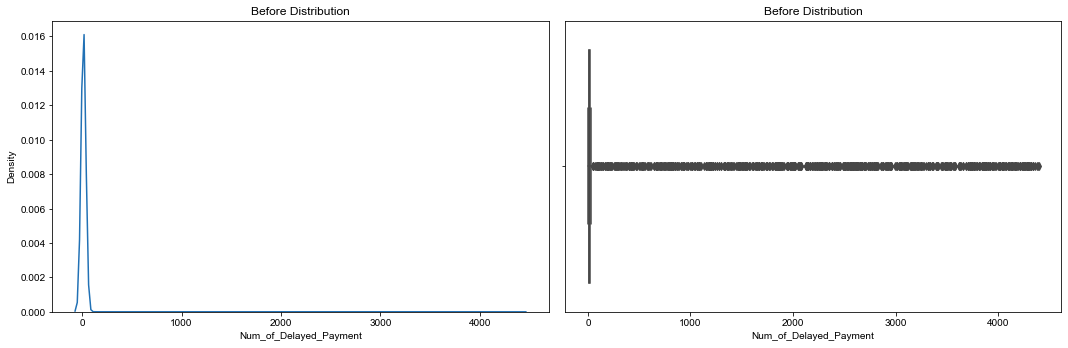

In [15]:
df=data.copy().reset_index()

distribution(col='Num_of_Delayed_Payment',data=df,i=0)


In [16]:
def get_num_of_delayed_payment(row):
    if pd.isnull(row['Num_of_Delayed_Payment']):
        Num_of_Delayed_Payement=(data[data['Customer_ID']==row['Customer_ID']]['Num_of_Delayed_Payment'].dropna()).mode()
        
        try:
            return Num_of_Delayed_Payement[0]
        except:
            return np.Nan
    
    else:
        return row['Num_of_Delayed_Payment']

In [17]:
data['Num_of_Delayed_Payment']=data.apply(get_num_of_delayed_payment,axis=1)

In [18]:
data['Num_of_Delayed_Payment'].isnull().sum()

0

In [19]:
data=data[data['Num_of_Delayed_Payment']<150]

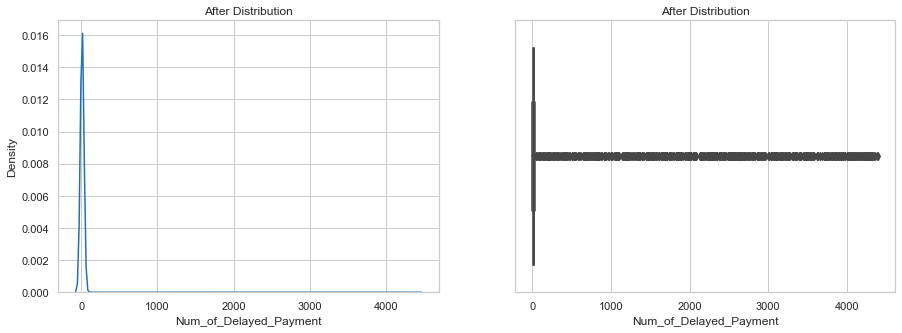

In [20]:
distribution(col='Num_of_Delayed_Payment',data=df,i=1)

### 02. Monthly_Inhand_Salary

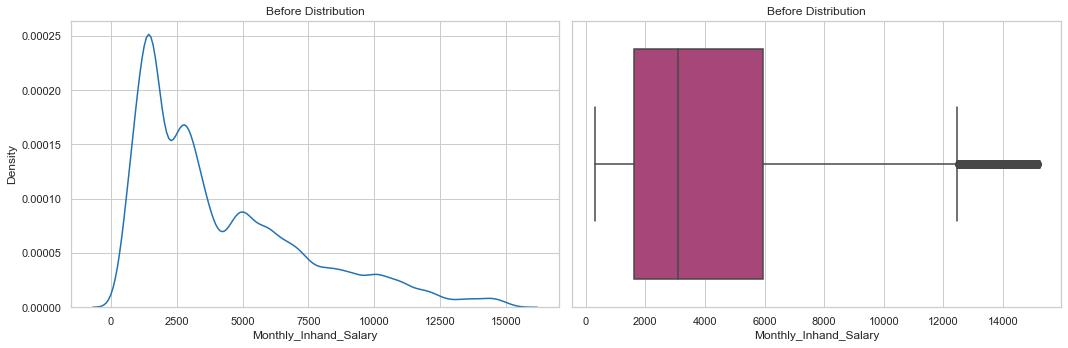

In [21]:
distribution(col='Monthly_Inhand_Salary',data=df,i=0)

In [22]:
def get_Monthly_Inhand_Salary(row):
    if pd.isnull(row['Monthly_Inhand_Salary']):
        Monthly_Inhand_Salary=(data[data['Customer_ID']==row['Customer_ID']]['Monthly_Inhand_Salary'].dropna()).mode()
        try:
            return Monthly_Inhand_Salary[0]
        except:
            return np.NaN
    else:
        return row['Monthly_Inhand_Salary']

In [23]:
data['Monthly_Inhand_Salary']=data.apply(get_Monthly_Inhand_Salary,axis=1)

In [24]:
data['Monthly_Inhand_Salary'].isnull().sum()


0

In [25]:
data=data[data.Monthly_Inhand_Salary<13500]
data.shape

(98017, 28)

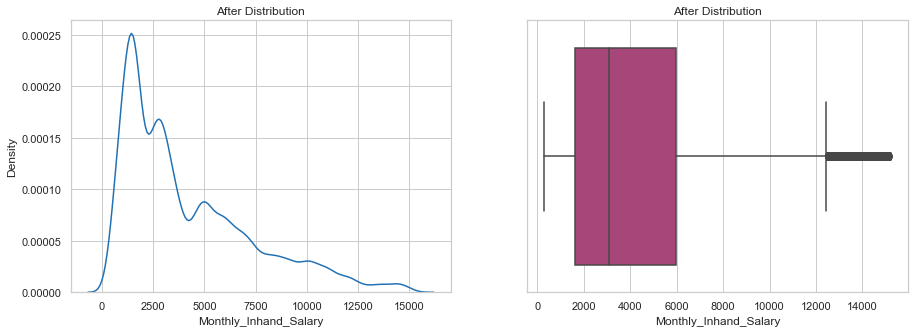

In [26]:
distribution(col='Monthly_Inhand_Salary',data=df,i=1)

In [27]:
## Changed_Credit_Limit

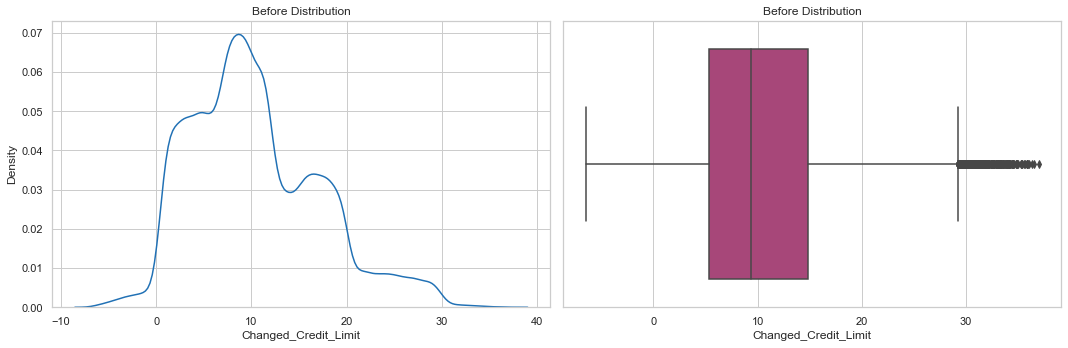

In [28]:
distribution(col='Changed_Credit_Limit',data=df,i=0)

In [29]:
def get_Changed_Credit_Limit(row):
    if pd.isnull(row['Changed_Credit_Limit']):
        Changed_Credit_Limit=(data[data['Customer_ID']==row['Customer_ID']]['Changed_Credit_Limit'].dropna()).mode()
        try:
            return Changed_Credit_Limit[0]
        except:
            return np.NaN
    else:
        return row['Changed_Credit_Limit']

In [30]:
data['Changed_Credit_Limit']=data.apply(get_Changed_Credit_Limit,axis=1)

In [31]:
data=data[data['Changed_Credit_Limit'] < 30]

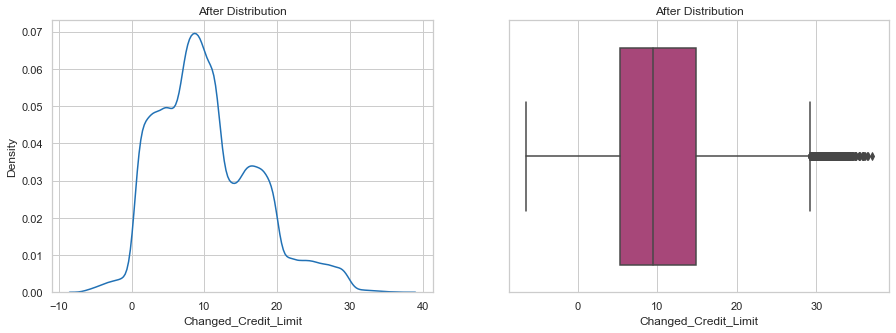

In [32]:
distribution(col='Changed_Credit_Limit',data=df,i=1)

In [33]:
## Num credit Inqueries

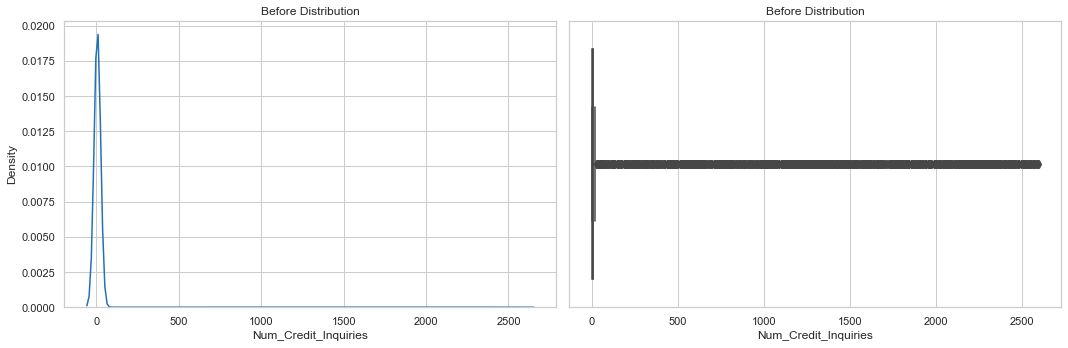

In [34]:
distribution(col='Num_Credit_Inquiries',data=df,i=0)

In [35]:
def get_Num_Credit_Inquiries(row):
    if pd.isnull(row['Num_Credit_Inquiries']):
        Num_Credit_Inquiries=(data[data['Customer_ID']==row['Customer_ID']]['Num_Credit_Inquiries'].dropna()).mode()
        try:
            return Num_Credit_Inquiries[0]
        except:
            return np.NaN
    else:
        return row['Num_Credit_Inquiries']

In [36]:
data['Num_Credit_Inquiries']=data.apply(get_Num_Credit_Inquiries,axis=1)

In [37]:
data=data[data['Num_Credit_Inquiries']<50]
data.shape

(96163, 28)

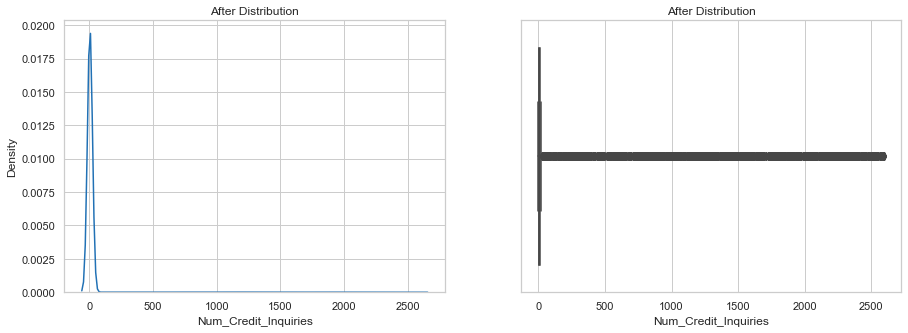

In [38]:
distribution(col='Num_Credit_Inquiries',data=df,i=1)

In [39]:
## Credit_History_Age

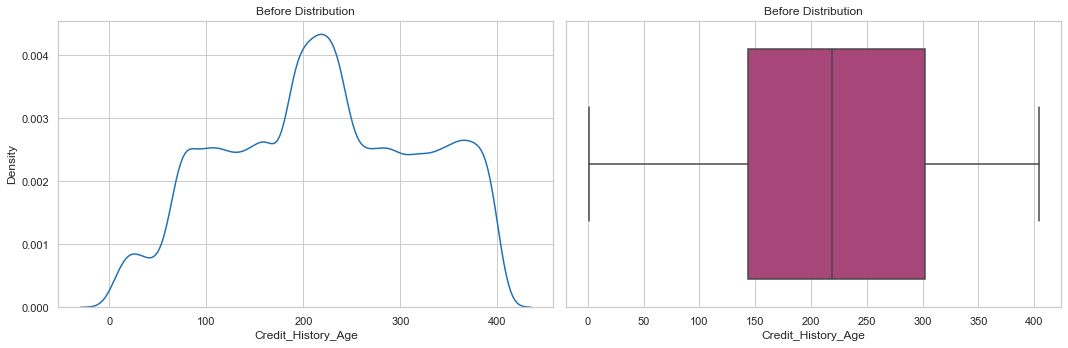

In [40]:
distribution(col='Credit_History_Age',data=df,i=0)

In [41]:
def get_Credit_History_Age(row):
    if pd.isnull(row['Credit_History_Age']):
        Credit_History_Age=(data[data['Customer_ID']==row['Customer_ID']]['Credit_History_Age'].dropna()).mode()
        try:
            return Credit_History_Age[0]
        except:
            return np.NaN
    else:
        return row['Credit_History_Age']

In [42]:
data['Credit_History_Age']=data.apply(get_Credit_History_Age,axis=1)

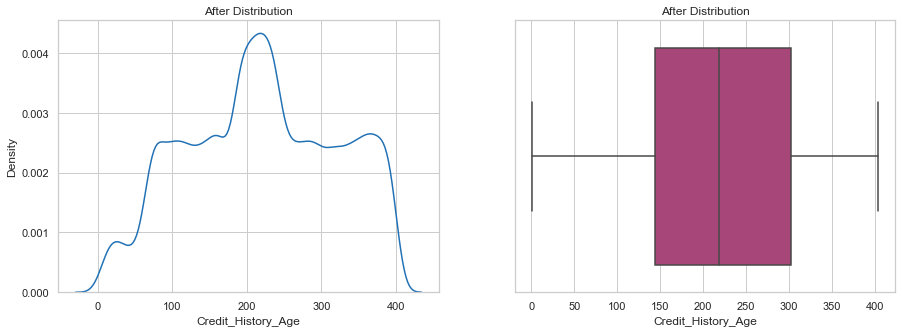

In [43]:
distribution(col='Credit_History_Age',data=df,i=1)

In [44]:
## Amount_Invested_Monthly

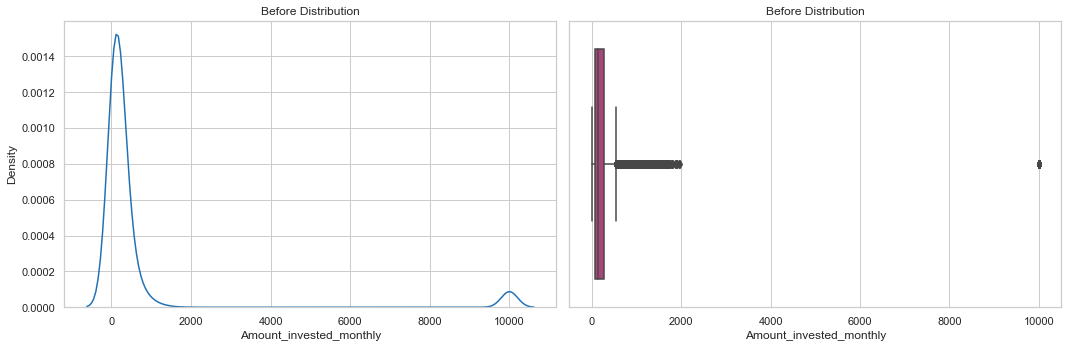

In [45]:
distribution(col='Amount_invested_monthly',data=df,i=0)

In [46]:
def get_Amount_invested_monthly(row):
    if pd.isnull(row['Amount_invested_monthly']):
        Amount_invested_monthly=(data[data['Customer_ID']==row['Customer_ID']]['Amount_invested_monthly'].dropna()).mode()
        try:
            return Amount_invested_monthly[0]
        except:
            return np.NaN
    else:
        return row['Amount_invested_monthly']

In [47]:
data['Amount_invested_monthly']=data.apply(get_Amount_invested_monthly,axis=1)

In [48]:
data=data[data['Amount_invested_monthly']<1000]

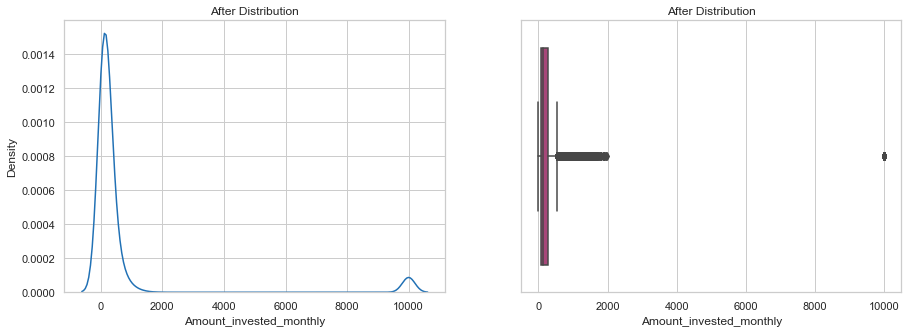

In [49]:
distribution(col='Amount_invested_monthly',data=df,i=1)

In [50]:
## Monthly Balance

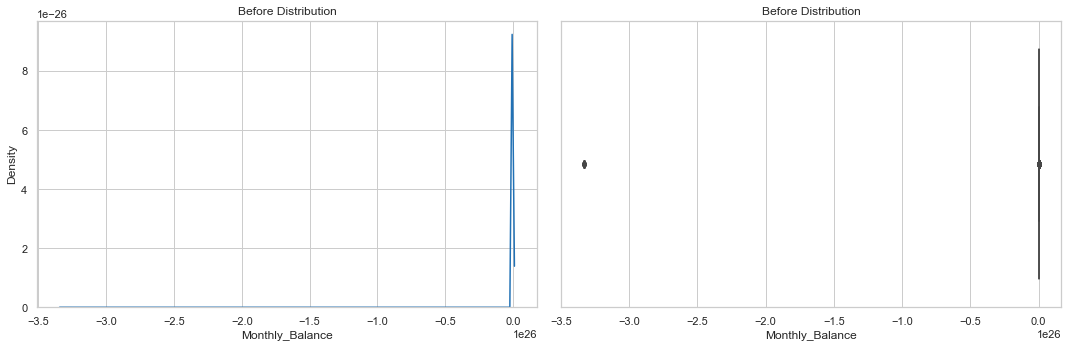

In [51]:
distribution(col='Monthly_Balance',data=df,i=0)


In [52]:
def get_Monthly_Balance(row):
    if pd.isnull(row['Monthly_Balance']):
        Monthly_Balance=(data[data['Customer_ID']==row['Customer_ID']]['Monthly_Balance'].dropna()).mode()
        try:
            return Monthly_Balance[0]
        except:
            return np.NaN
    else:
        return row['Monthly_Balance']

In [53]:
data['Monthly_Balance']=data.apply(get_Monthly_Balance,axis=1)

In [54]:
print(data[data['Monthly_Balance'] <= 0].shape)
data = data[data['Monthly_Balance'] > 0]

(9, 28)


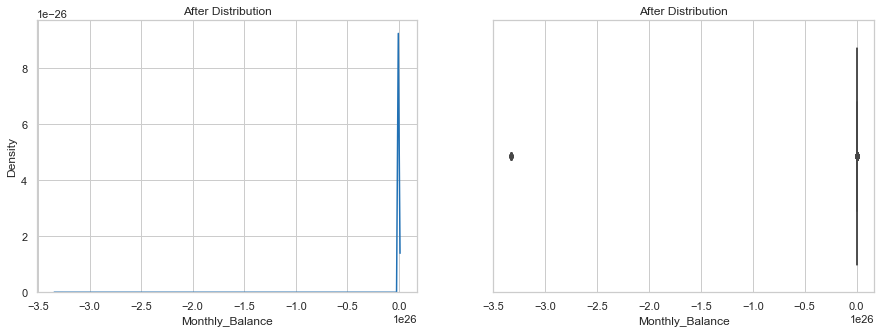

In [55]:
distribution(col='Monthly_Balance',data=df,i=1)

In [56]:
### Occupation

In [57]:
def get_Occupation(row):
    if pd.isnull(row['Occupation']):
        Occupation=(data[data['Customer_ID']==row['Customer_ID']]['Occupation'].dropna()).mode()
        try:
            return Occupation[0]
        except:
            return np.NaN
    else:
        return row['Occupation']

In [58]:
data['Occupation']=data.apply(get_Occupation,axis=1)

In [59]:
data['Occupation'] = data['Occupation'].fillna(data['Occupation'].mode()[0])

In [60]:
### Types of loan

In [61]:
data['Type_of_Loan'] = data['Type_of_Loan'].fillna('Not Specified')

In [62]:
data.drop('Type_of_Loan',axis=1,inplace=True)

In [63]:
## Credit mix

In [64]:
def get_Credit_Mix(row):
    if pd.isnull(row['Credit_Mix']):
        Credit_Mix=(data[data['Customer_ID']==row['Customer_ID']]['Credit_Mix'].dropna()).mode()
        try:
            return Credit_Mix[0]
        except:
            return np.NaN
    else:
        return row['Credit_Mix']

In [65]:
data['Credit_Mix']=data.apply(get_Credit_Mix,axis=1)

In [66]:
data['Credit_Mix'] = data['Credit_Mix'].fillna(data['Credit_Mix'].mode()[0])

In [67]:
## payment behaviour

In [68]:
def get_Payment_Behaviour(row):
    if pd.isnull(row['Payment_Behaviour']):
        Payment_Behaviour=(data[data['Customer_ID']==row['Customer_ID']]['Payment_Behaviour'].dropna()).mode()
        try:
            return Payment_Behaviour[0]
        except:
            return np.NaN
    else:
        return row['Payment_Behaviour']
    

In [69]:
data['Payment_Behaviour']=data.apply(get_Payment_Behaviour,axis=1)

In [70]:
data['Payment_Behaviour'] = data['Payment_Behaviour'].fillna(data['Payment_Behaviour'].mode()[0])

In [71]:
## Age

In [72]:
def get_age(row):
    if (60 < row['Age']) or (0 > row['Age']) :
        Age=(data[data['Customer_ID']==row['Customer_ID']]['Age'].dropna()).mode()
        try:
            return Age[0]
        except:
            return np.NaN
    else:
        return row['Age']

In [73]:
data['Age']=data.apply(get_age,axis=1)

In [74]:
data.drop(data[data['Age'] > 60].index,axis=0,inplace=True)

In [75]:
data.drop(data[data['Age']  < 0].index,axis=0,inplace=True)

In [76]:
## Annual_income

In [77]:
def get_Annual_Income(row):
    if 150000 < row['Annual_Income'] :
        Annual_Income=(data[data['Customer_ID']==row['Customer_ID']]['Annual_Income'].dropna()).mode()
        try:
            return Annual_Income[0]
        except:
            return np.NaN
    else:
        return row['Annual_Income']

In [78]:
data['Annual_Income']=data.apply(get_Annual_Income,axis=1)

In [79]:
data.drop(data[data['Annual_Income']  > 165000].index,axis=0,inplace=True)

In [80]:
## Num_Bank_Accounts

In [81]:
def get_Num_Bank_Accounts(row):
    if 12 < row['Num_Bank_Accounts'] :
        Num_Bank_Accounts=(data[data['Customer_ID']==row['Customer_ID']]['Num_Bank_Accounts'].dropna()).mode()
        try:
            return Num_Bank_Accounts[0]
        except:
            return np.NaN
    else:
        return row['Num_Bank_Accounts']

In [82]:
data['Num_Bank_Accounts']=data.apply(get_Num_Bank_Accounts,axis=1)

In [83]:
data.drop(data[data['Num_Bank_Accounts']  > 12].index,axis=0,inplace=True)
data.drop(data[data['Num_Bank_Accounts']  < 0].index,axis=0,inplace=True)



In [84]:
### Num_Credit_card

In [85]:
def get_Num_Credit_Card(row):
    if 14 < row['Num_Credit_Card'] :
        Num_Credit_Card=(data[data['Customer_ID']==row['Customer_ID']]['Num_Credit_Card'].dropna()).mode()
        try:
            return Num_Credit_Card[0]
        except:
            return np.NaN
    else:
        return row['Num_Credit_Card']

In [86]:
data['Num_Credit_Card']=data.apply(get_Num_Credit_Card,axis=1)

In [87]:
data.drop(data[data['Num_Credit_Card']  > 14].index,axis=0,inplace=True)

In [88]:
### Intrest Rate

In [89]:
def get_Interest_Rate(row):
    if 35 < row['Interest_Rate'] :
        Interest_Rate=(data[data['Customer_ID']==row['Customer_ID']]['Interest_Rate'].dropna()).mode()
        try:
            return Interest_Rate[0]
        except:
            return np.NaN
    else:
        return row['Interest_Rate']

In [90]:
data['Interest_Rate']=data.apply(get_Interest_Rate,axis=1)


In [91]:
## Num of loan

In [92]:
def get_Num_of_Loan(row):
    if (8 < row['Num_of_Loan']) or (0 > row['Num_of_Loan']):
        Num_of_Loan=(data[data['Customer_ID']==row['Customer_ID']]['Num_of_Loan'].dropna()).mode()
        try:
            return Num_of_Loan[0]
        except:
            return np.NaN
    else:
        return row['Num_of_Loan']

In [93]:
data['Num_of_Loan']=data.apply(get_Num_of_Loan,axis=1)

In [94]:
data.drop(data[data['Num_of_Loan']  < 0].index,axis=0,inplace=True)

In [95]:
### Total Emi per month

In [96]:
data=data[data['Total_EMI_per_month']<5000]


In [98]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,-1,4.0,11.27,4.0,Good,809.98,31.944960,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,6,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [99]:
data.fillna(0)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,-1,4.0,11.27,4.0,Good,809.98,31.944960,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,6,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,78735990.0,Mechanic,39628.99,3359.415833,4,6,7,2,23,7.0,11.50,3.0,Good,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,78735990.0,Mechanic,39628.99,3359.415833,4,6,7,2,18,7.0,11.50,3.0,Good,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,78735990.0,Mechanic,39628.99,3359.415833,4,6,7,2,27,6.0,11.50,3.0,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,78735990.0,Mechanic,39628.99,3359.415833,4,6,7,2,20,6.0,11.50,3.0,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [100]:
data.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        8826
Age                            0
SSN                         4927
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64

In [101]:
### 

data.to_csv('./credit_data.csv',index=False)